In [3]:
library(ggplot2)
library(data.table)

In [4]:
graph_dt = fread("/Users/ebiederstedt/downloads/filtered10K_graph14_pairedFASTQs_subsample002_scores_identity.csv")
ref_dt = fread("/Users/ebiederstedt/downloads/ref_novflag_pairedFASTQs_k14_subsample002_scores_identity.csv")

Read 31125004 rows and 2 (of 2) columns from 0.291 GB file in 00:00:09
Read 31138410 rows and 2 (of 2) columns from 0.321 GB file in 00:00:13


In [8]:
print(dim(graph_dt)[1])                                                                                                                                                                                              
## 31125004                                                                                                                                                                                                          
                                                                                                                                                                                                                     
print(dim(ref_dt)[1])  
## 31138410

[1] 31125004
[1] 31138410


In [9]:
graph_dt[, type:='graph_subsample0.01']                                                                                                                                                                              
ref_dt[, type:='ref_subsample0.01']                                                                                                                                                                                  
                                        

In [10]:
print("graph_dt, mean scores ")                                                                                                                                                                                      
mean(graph_dt$scores)                                                                                                                                                                                                
print("ref_dt, mean scores ")                                                                                                                                                                                        
mean(ref_dt$scores)                                                                                                                                                                                                  
print("graph_dt, mean identity ")                                                                                                                                                                                    
mean(graph_dt$indentity)                                                                                                                                                                                             
print("ref_dt, mean identity ")                                                                                                                                                                                      
mean(ref_dt$indentity)                                                                                                                                                                                               
                            

[1] "graph_dt, mean scores "


[1] 108.859

[1] "ref_dt, mean scores "


[1] 108.1

[1] "graph_dt, mean identity "


[1] 0.9913121

[1] "ref_dt, mean identity "


[1] 0.9891254

In [11]:
list_of_dts = list(graph_dt, ref_dt)   

In [12]:
final = Reduce(function(...) merge(..., all = TRUE), list_of_dts)                                                                                                                                                    
         

In [13]:
head(final)

indentity,scores,type
0.1782178,23,graph_subsample0.01
0.1782178,23,graph_subsample0.01
0.1782178,23,ref_subsample0.01
0.1782178,23,ref_subsample0.01
0.1782178,23,ref_subsample0.01
0.1782178,23,ref_subsample0.01


In [14]:
## misspelled "identity", indentity
final[, identity:= indentity]                                                                                                                                                                                        
final[, indentity := NULL]     

In [15]:
head(final)                                                                                                                                                                                                          
                                                                                                                                                                                                                     
min(final$scores)                                                                                                                                                                                                    
## 23                                                                                                                                                                                                                
                                                                                                                                                                                                                     
max(final$scores)  ## 111 

scores,type,identity
23,graph_subsample0.01,0.1782178
23,graph_subsample0.01,0.1782178
23,ref_subsample0.01,0.1782178
23,ref_subsample0.01,0.1782178
23,ref_subsample0.01,0.1782178
23,ref_subsample0.01,0.1782178


[1] 23

[1] 111

In [17]:
pp = ggplot(final, aes(type, scores, fill=type)) + geom_boxplot() +  ylim(90, 115) +                                                                                                                                                
    labs(title= "GAM scores, Reference vs. Graph, subsample 0.02", x="type", y = "scores, from 23 to 111")  + theme(legend.position="none")                                                                          
                    

Warning message:
“Removed 2111505 rows containing non-finite values (stat_boxplot).”

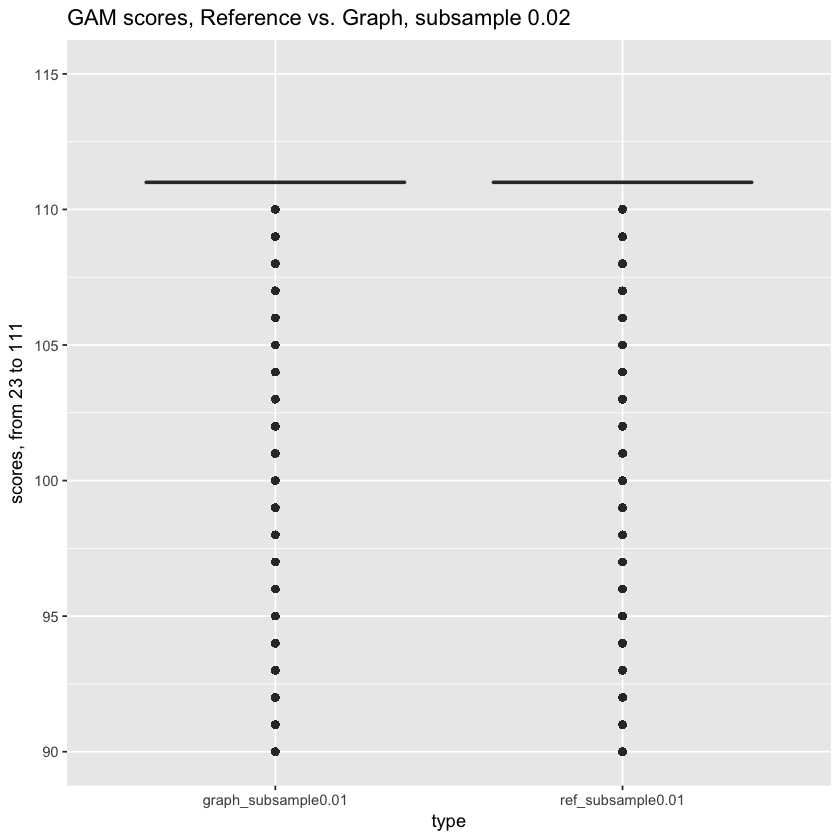

In [18]:
print(pp)

In [19]:
pp2 = ggplot(final, aes(type, scores, fill=type)) + geom_boxplot() + ylim(90, 120) +                                                                                                                                                 
    labs(title= "GAM scores, Reference vs. Graph, subsample 0.01", x="type", y = "scores, from 23 to 111")  + theme(legend.position="none")                                                                          
                    

Warning message:
“Removed 2111505 rows containing non-finite values (stat_boxplot).”

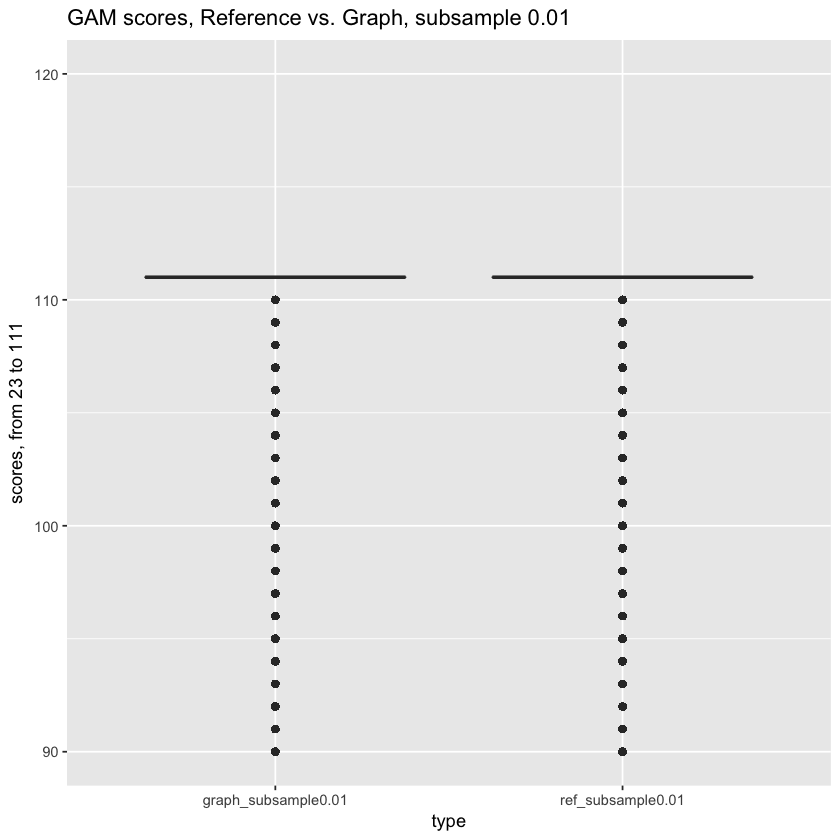

In [20]:
print(pp2)

In [21]:
print(min(final$identity))                                                                                                                                                                                                 
## 0.1881188                                                                                                                                                                                                         
                                                                                                                                                                                                                     
print(max(final$identity))                                                                                                                                                                                                
## 1                   

[1] 0.1782178
[1] 1


In [22]:
dd = ggplot(final, aes(type, identity, fill=type)) + geom_boxplot() + 
     labs(title= "GAM identity values, Reference vs. Graph, subsample 0.01", x="type", y = "scores, from 0.188 to 1.0")  + theme(legend.position="none")

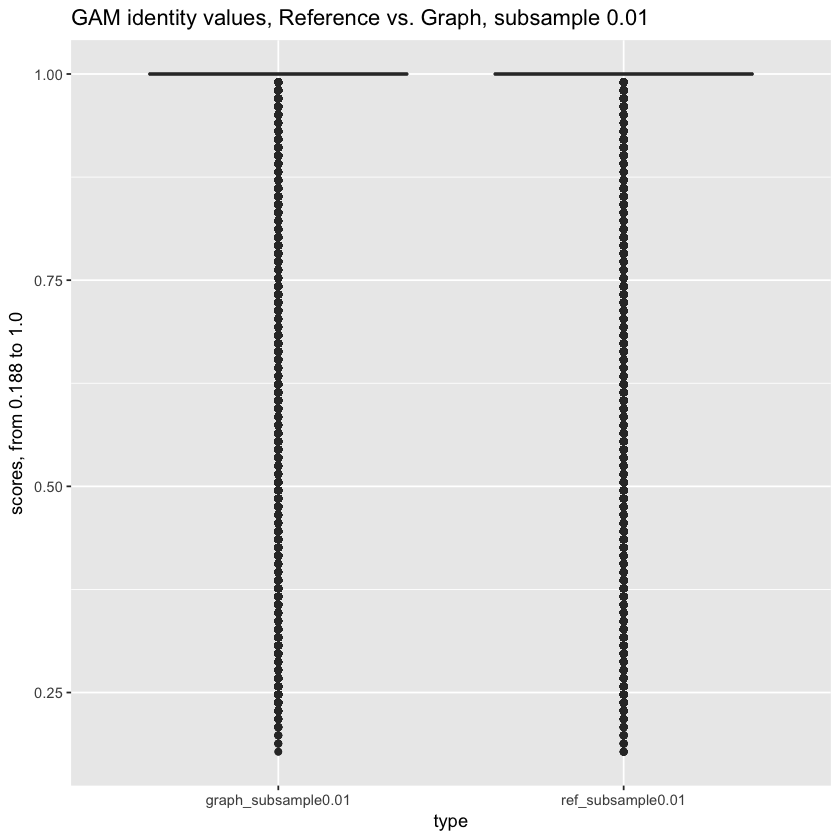

In [23]:
print(dd)

In [37]:
graph_map = fread("/Users/ebiederstedt/downloads/filtered10K_graph14_pairedFASTQs_subsample002_mapping_quality.csv")
ref_map = fread("/Users/ebiederstedt/downloads/ref_novflag_pairedFASTQs_k14_subsample002_mapping_quality.csv")

In [38]:
graph_map[, type:='graph_subsample0.02']                                                                                                                                                                              
ref_map[, type:='ref_subsample0.02']       

In [39]:
print(dim(graph_map)[1])  ### number of scores, identity values 
print(dim(ref_map)[1])

[1] 28673642
[1] 28766384


In [40]:
print("graph mapping quality")
print(mean(graph_map$V1))
print("ref mapping quality")
print(mean(ref_map$V1))

[1] "graph mapping quality"
[1] 58.84734
[1] "ref mapping quality"
[1] 59.04221


In [41]:
list_of_dts = list(graph_map, ref_map)

In [42]:
final = Reduce(function(...) merge(..., all = TRUE), list_of_dts)

In [43]:
final = final[, c('V1', 'type')]

In [44]:
final[, mapping_quality := V1]
final[, V1:=NULL]

In [45]:
head(final)

type,mapping_quality
graph_subsample0.02,1
graph_subsample0.02,1
graph_subsample0.02,1
graph_subsample0.02,1
graph_subsample0.02,1
graph_subsample0.02,1


In [46]:
max(final$mapping_quality)

[1] 60

In [47]:
min(final$mapping_quality)

[1] 1

In [48]:
dd = ggplot(final, aes(type, mapping_quality, fill=type)) + geom_boxplot() + 
     labs(title= "GAM mapping qualities, Reference vs. Graph, subsample 0.02", x="type", y = "Mapping Qualities, from 1 to 60")  + theme(legend.position="none")

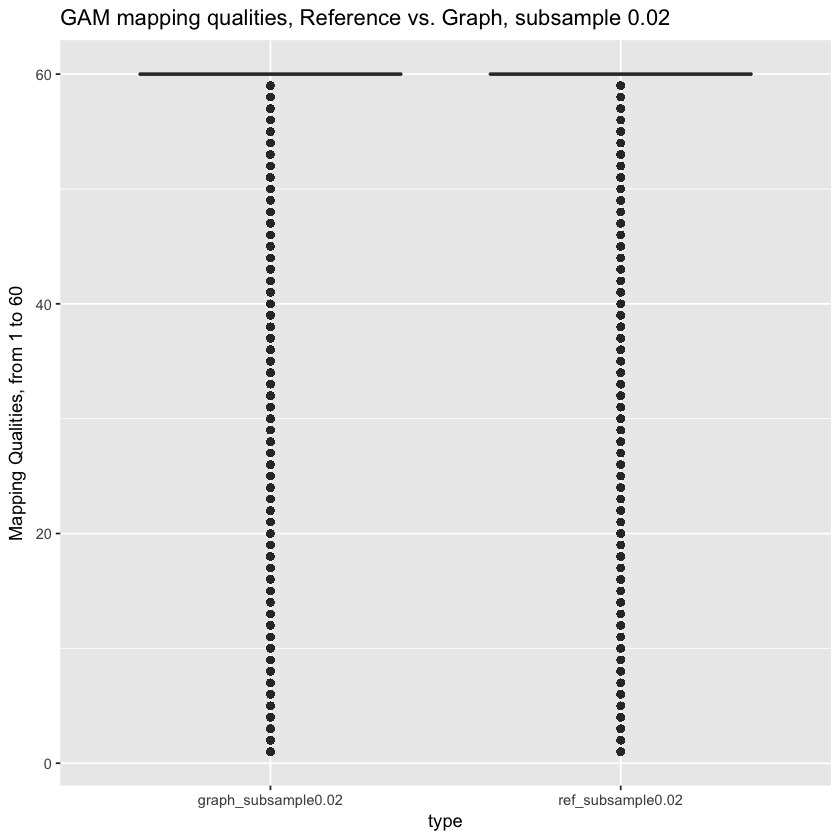

In [49]:
print(dd)

In [50]:
## print(dim(graph_dt)[1])                                                                                                                                                                                              
## ## 31125004                                                                                                                                                                                                          
                                                                                                                                                                                                                     
## print(dim(ref_dt)[1])  
## ## 31138410

In [51]:
31125004 - 31138410

[1] -13406

In [52]:
dt = data.table(type=c("GRAPH", "REFERENCE"),
                number_mappings=c(31125004, 31138410))

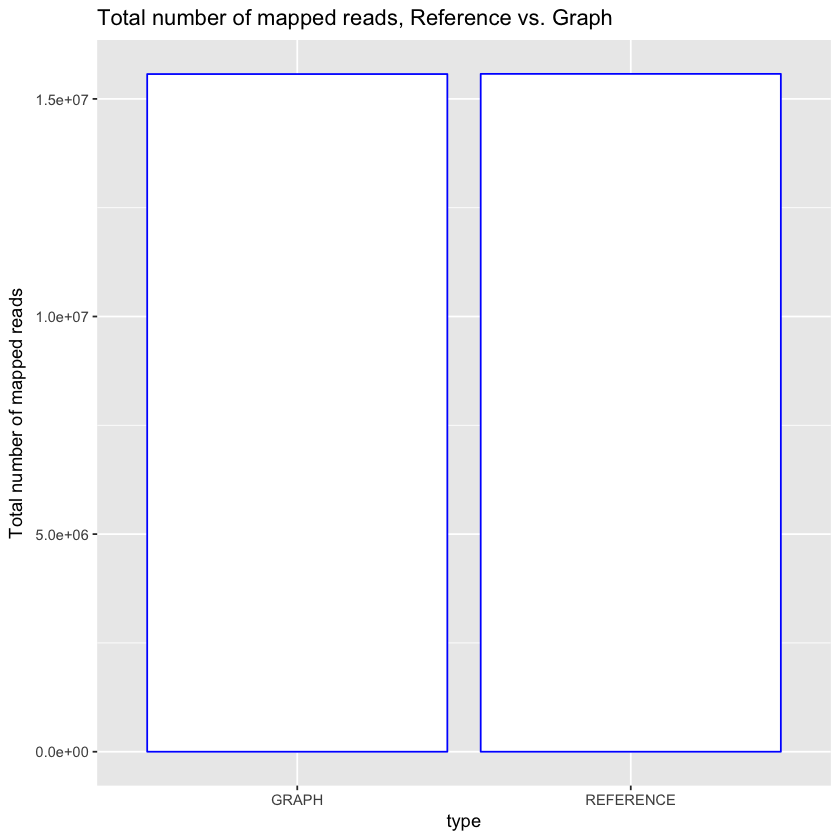

In [53]:
ggplot(data=dt, aes(x=type, y=number_mappings)) +
  geom_bar(stat="identity", color="blue", fill="white") +
  labs(title= "Total number of mapped reads, Reference vs. Graph", x="type", y = "Total number of mapped reads")

In [54]:
graph_map[, mapping_quality := V1]
graph_map[, V1 := NULL]

ref_map[, mapping_quality := V1]
ref_map[, V1 := NULL]


In [55]:
aa = ggplot(graph_map, aes(x = mapping_quality)) + geom_density(fill = "steelblue") +
  geom_vline(aes(xintercept = mean(mapping_quality)), 
             linetype = "dashed", size = 0.6) +
  labs(title= "Density of mapping quality, Graph, subsample 0.02", x="mapping quality", y = "density")

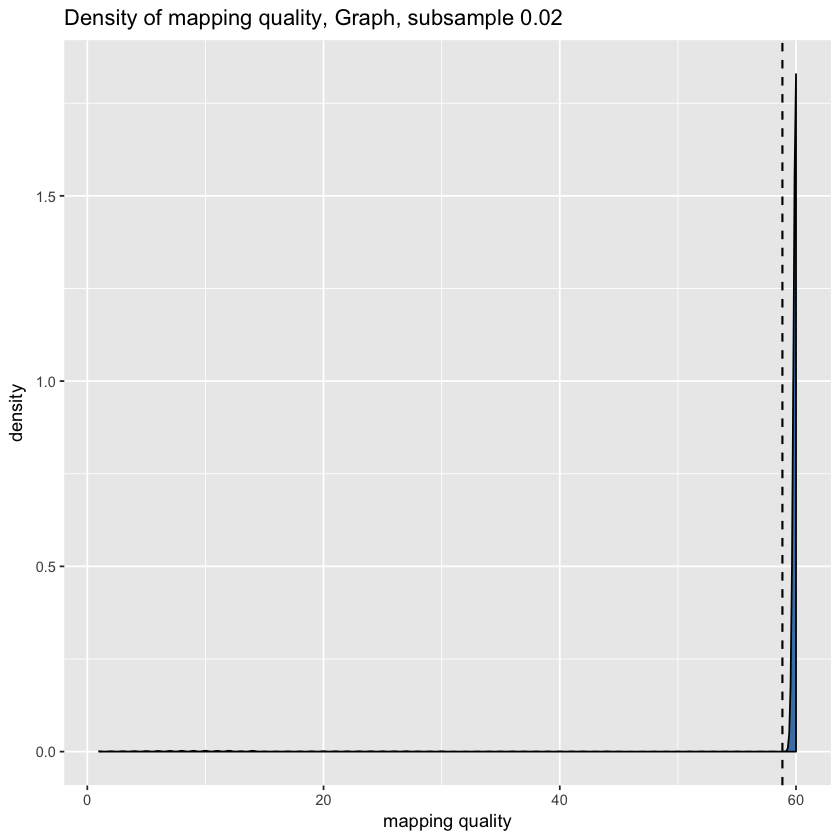

In [56]:
print(aa)

In [57]:
bb = ggplot(ref_map, aes(x = mapping_quality)) + geom_density( fill = "steelblue") +
  geom_vline(aes(xintercept = mean(mapping_quality)), 
             linetype = "dashed", size = 0.6) +
  labs(title= "Density of mapping quality, Reference, subsample 0.01", x="mapping quality", y = "density")

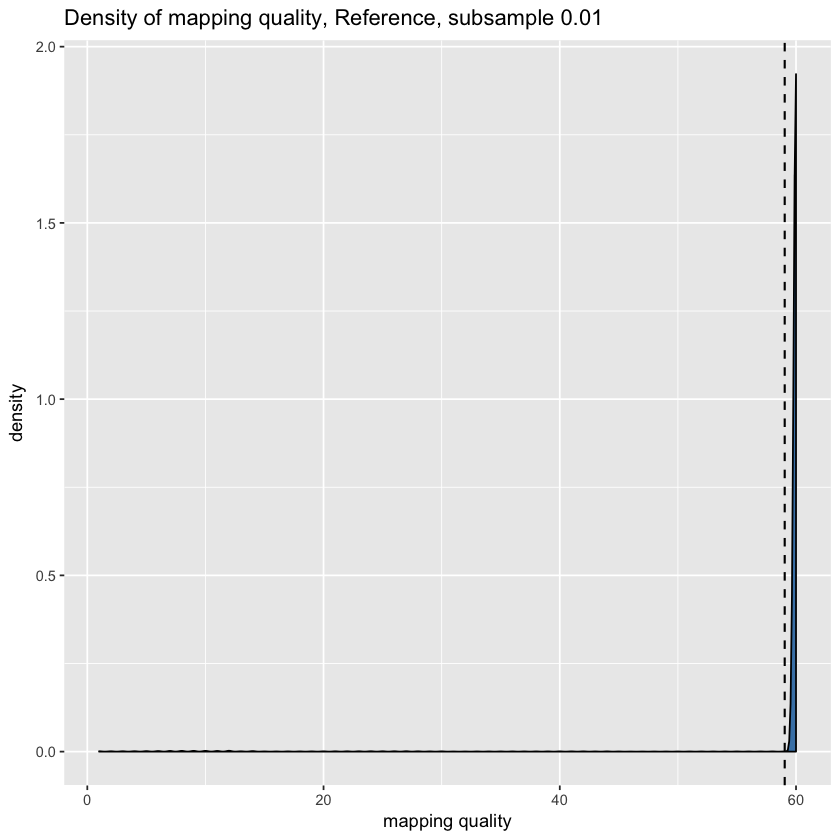

In [58]:
print(bb)